In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("C:\\Users\\91944\\Desktop\\data\\sign_mnist_train.csv")
test = pd.read_csv("C:\\Users\\91944\\Desktop\\data\\sign_mnist_test.csv")

In [4]:
print(train.shape)
print(test.shape)

(27455, 785)
(7172, 785)


In [5]:
train_set = np.array(train, dtype = 'float32')
test_set = np.array(test, dtype='float32')

The letter in the image is: O


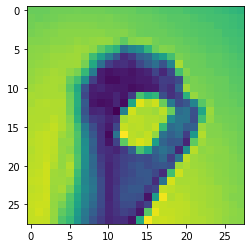

In [7]:
image_no = 550
y_test = test_set[:,0]
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]
plt.imshow(test_set[image_no,1:].reshape(28,28))

print("The letter in the image is:",class_names[int(y_test[image_no])])

In [12]:
print(set(y_test))

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0}


In [9]:
print(test[:,0])

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [14]:
y_test = test_set[:,0]

In [16]:
print(y_test[100])

8.0


In [12]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

(-0.5, 27.5, 27.5, -0.5)

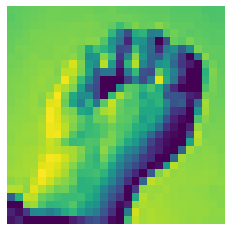

In [7]:
i = 100
plt.imshow(train_set[i,1:].reshape((28,28))) 
plt.imshow(train_set[i,1:].reshape((28,28))) 


plt.axis('off')

In [10]:
X_train = train_set[:, 1:] / 255
y_train = train_set[:, 0]

X_test = test_set[:, 1:] / 255
y_test = test_set[:,0]

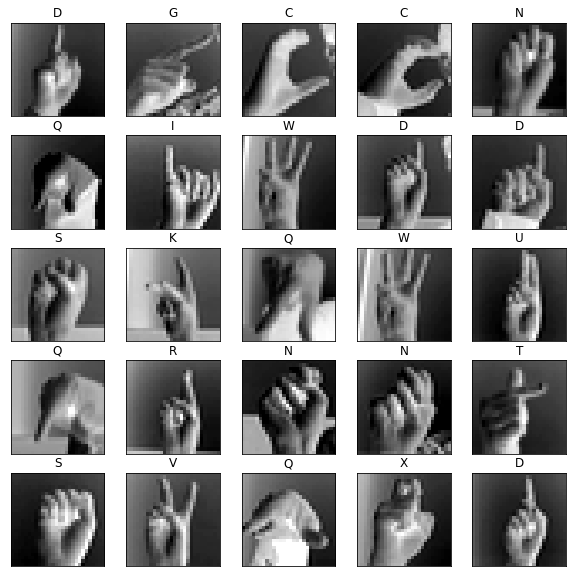

In [13]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [22]:
print(X_train.shape)
print(y_train.shape)

(21964, 784)
(21964,)


In [23]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)


(21964, 28, 28, 1)
(21964,)
(5491, 28, 28, 1)


In [4]:
##### THE COMPLETE MODEL IN PYTHO N###
#### WE WILL FIRST TRY TO IMPLEMENT THE LAST TWO DENSE LAYERS NOW IN VERILOG ####
#### THEN WE CAN TRY TO IMPLEMENT CONV LAYERS #### (A1,A2,A3,A4)

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

#Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten()) # the output of this layer will be given to the system

cnn_model.add(Dense(units = 512, activation = 'relu',use_bias = False)) 
cnn_model.add(Dense(units = 25, activation = 'softmax', use_bias = False))

ModuleNotFoundError: No module named 'tensorflow'

In [75]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)        

In [76]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])


#Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 50, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/50
43/43 [==============================] - 8s 177ms/step - loss: 3.1866 - accuracy: 0.0509 - val_loss: 2.9734 - val_accuracy: 0.1266
Epoch 2/50
43/43 [==============================] - 7s 158ms/step - loss: 2.7979 - accuracy: 0.1436 - val_loss: 2.2324 - val_accuracy: 0.3178
Epoch 3/50
43/43 [==============================] - 7s 155ms/step - loss: 2.1303 - accuracy: 0.3142 - val_loss: 1.6099 - val_accuracy: 0.4875
Epoch 4/50
43/43 [==============================] - 7s 155ms/step - loss: 1.6350 - accuracy: 0.4662 - val_loss: 1.1042 - val_accuracy: 0.6578
Epoch 5/50
43/43 [==============================] - 7s 152ms/step - loss: 1.2389 - accuracy: 0.5838 - val_loss: 0.7839 - val_accuracy: 0.7618
Epoch 6/50
43/43 [==============================] - 7s 153ms/step - loss: 0.9416 - accuracy: 0.6778 - val_loss: 0.5850 - val_accuracy: 0.8352
Epoch 7/50
43/43 [==============================] - 7s 153ms/step - loss: 0.7742 - accuracy: 0.7388 - val_loss: 0.4244 - val_accuracy: 0.8765
Epoch 